<a href="https://colab.research.google.com/github/SteelworkerDB/AML_W2/blob/main/EjercicioPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicio de PCA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier

##1. Carga de datos

In [ ]:
[X_train, y_train],[X_test, y_test]=mnist.load_data()

In [ ]:
X_train.shape[1]

28

In [ ]:
X_train=X_train.reshape(X_train.shape[0],-1)
X_test=X_test.reshape(X_test.shape[0],-1)

##2. Preparación de datos

In [ ]:
scaler=StandardScaler() #Para escalar los datos

In [ ]:
pca=PCA(n_components=0.95) #Principal Component Analysis al 95%

In [ ]:
#Ajuste del escalador y transformaciones respectivas:
X_train_sc=scaler.fit_transform(X_train)
X_test_sc=scaler.transform(X_test)
#Ajuste y transformación usando pca:
X_train_pcs=pca.fit_transform(X_train_sc)
X_test_pcs=pca.transform(X_test_sc)

##3. Crear dos modelos KNN

In [ ]:
X_train_pcs.shape

(60000, 331)

In [ ]:
X_test_pcs.shape

(10000, 331)

a) Utilizando datos transformados

In [ ]:
#Modelo de K vecinos para datos con pca, lo llamamos knnt
knnt=KNeighborsClassifier(n_neighbors=5)
knnt.fit(X_train_pcs,y_train)


KNeighborsClassifier()

##4. Evaluación de modelos

In [ ]:
%%time
#Predicciones y reporte de modelo CON PCA
y_pred_knnt=knnt.predict(X_test_pcs)
print(classification_report(y_test,y_pred_knnt))


              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.96      0.99      0.98      1135
           2       0.96      0.94      0.95      1032
           3       0.94      0.96      0.95      1010
           4       0.95      0.94      0.95       982
           5       0.94      0.93      0.93       892
           6       0.96      0.97      0.97       958
           7       0.94      0.93      0.93      1028
           8       0.96      0.91      0.93       974
           9       0.93      0.92      0.92      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

CPU times: user 28.5 s, sys: 14.6 ms, total: 28.5 s
Wall time: 17.8 s


a) Utilizando datos originales

In [ ]:
#Modelo de K vecinos para datos sin pca, lo llamamos knno
knno=KNeighborsClassifier(n_neighbors=5)
knno.fit(X_train_sc,y_train)

KNeighborsClassifier()

In [ ]:
%%time
#Predicciones y reporte de modelo SIN PCA
y_pred_knno=knno.predict(X_test_sc)
print(classification_report(y_test,y_pred_knno))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.99      0.97      1135
           2       0.96      0.93      0.94      1032
           3       0.92      0.95      0.94      1010
           4       0.94      0.94      0.94       982
           5       0.93      0.92      0.93       892
           6       0.96      0.97      0.97       958
           7       0.94      0.92      0.93      1028
           8       0.96      0.90      0.93       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

CPU times: user 1min 1s, sys: 48.9 ms, total: 1min 1s
Wall time: 36.7 s


##Comprobando una predicción:

In [ ]:
Xt=np.reshape(X_test,(10000,28,28))

In [ ]:
img=Xt[1]

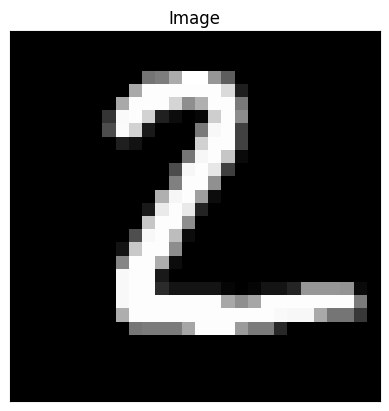

In [ ]:
from google.colab.patches import cv2, cv2_imshow
import sys

#Para observar imagenes de matrices
#REF https://stackoverflow.com/questions/62573348/show-processed-images-in-google-colab
image=cv2_imshow(img)
plt.imshow(img, cmap=plt.get_cmap('gray'),vmin=0,vmax=255)
plt.title('Imagen agrandada'), plt.xticks([]), plt.yticks([])
plt.show()


In [ ]:
y_pred_knno[1]

2

La predicción coincide.

##5. Preguntas:

a) ¿Qué modelo funcionó mejor en el conjunto de prueba?

- Funcionó mejor el modelo con dimensionalidad reducida al 95%, pero no existe mucha diferencia, la exactitud que presentaron el modelo con pca y sin pca es de 95% y 94% respectivamente.

b) ¿Qué modelo fue el más rápido en hacer predicciones?

- El modelo más rápido fue el primero con pca, 28.1s vs el modelo sin pca que demoró 1min 2s.  